# Creating Diagrams


## Diagrams package
This site uses the diagrams python package to draw all diagrams as code. 





### SW Architecture

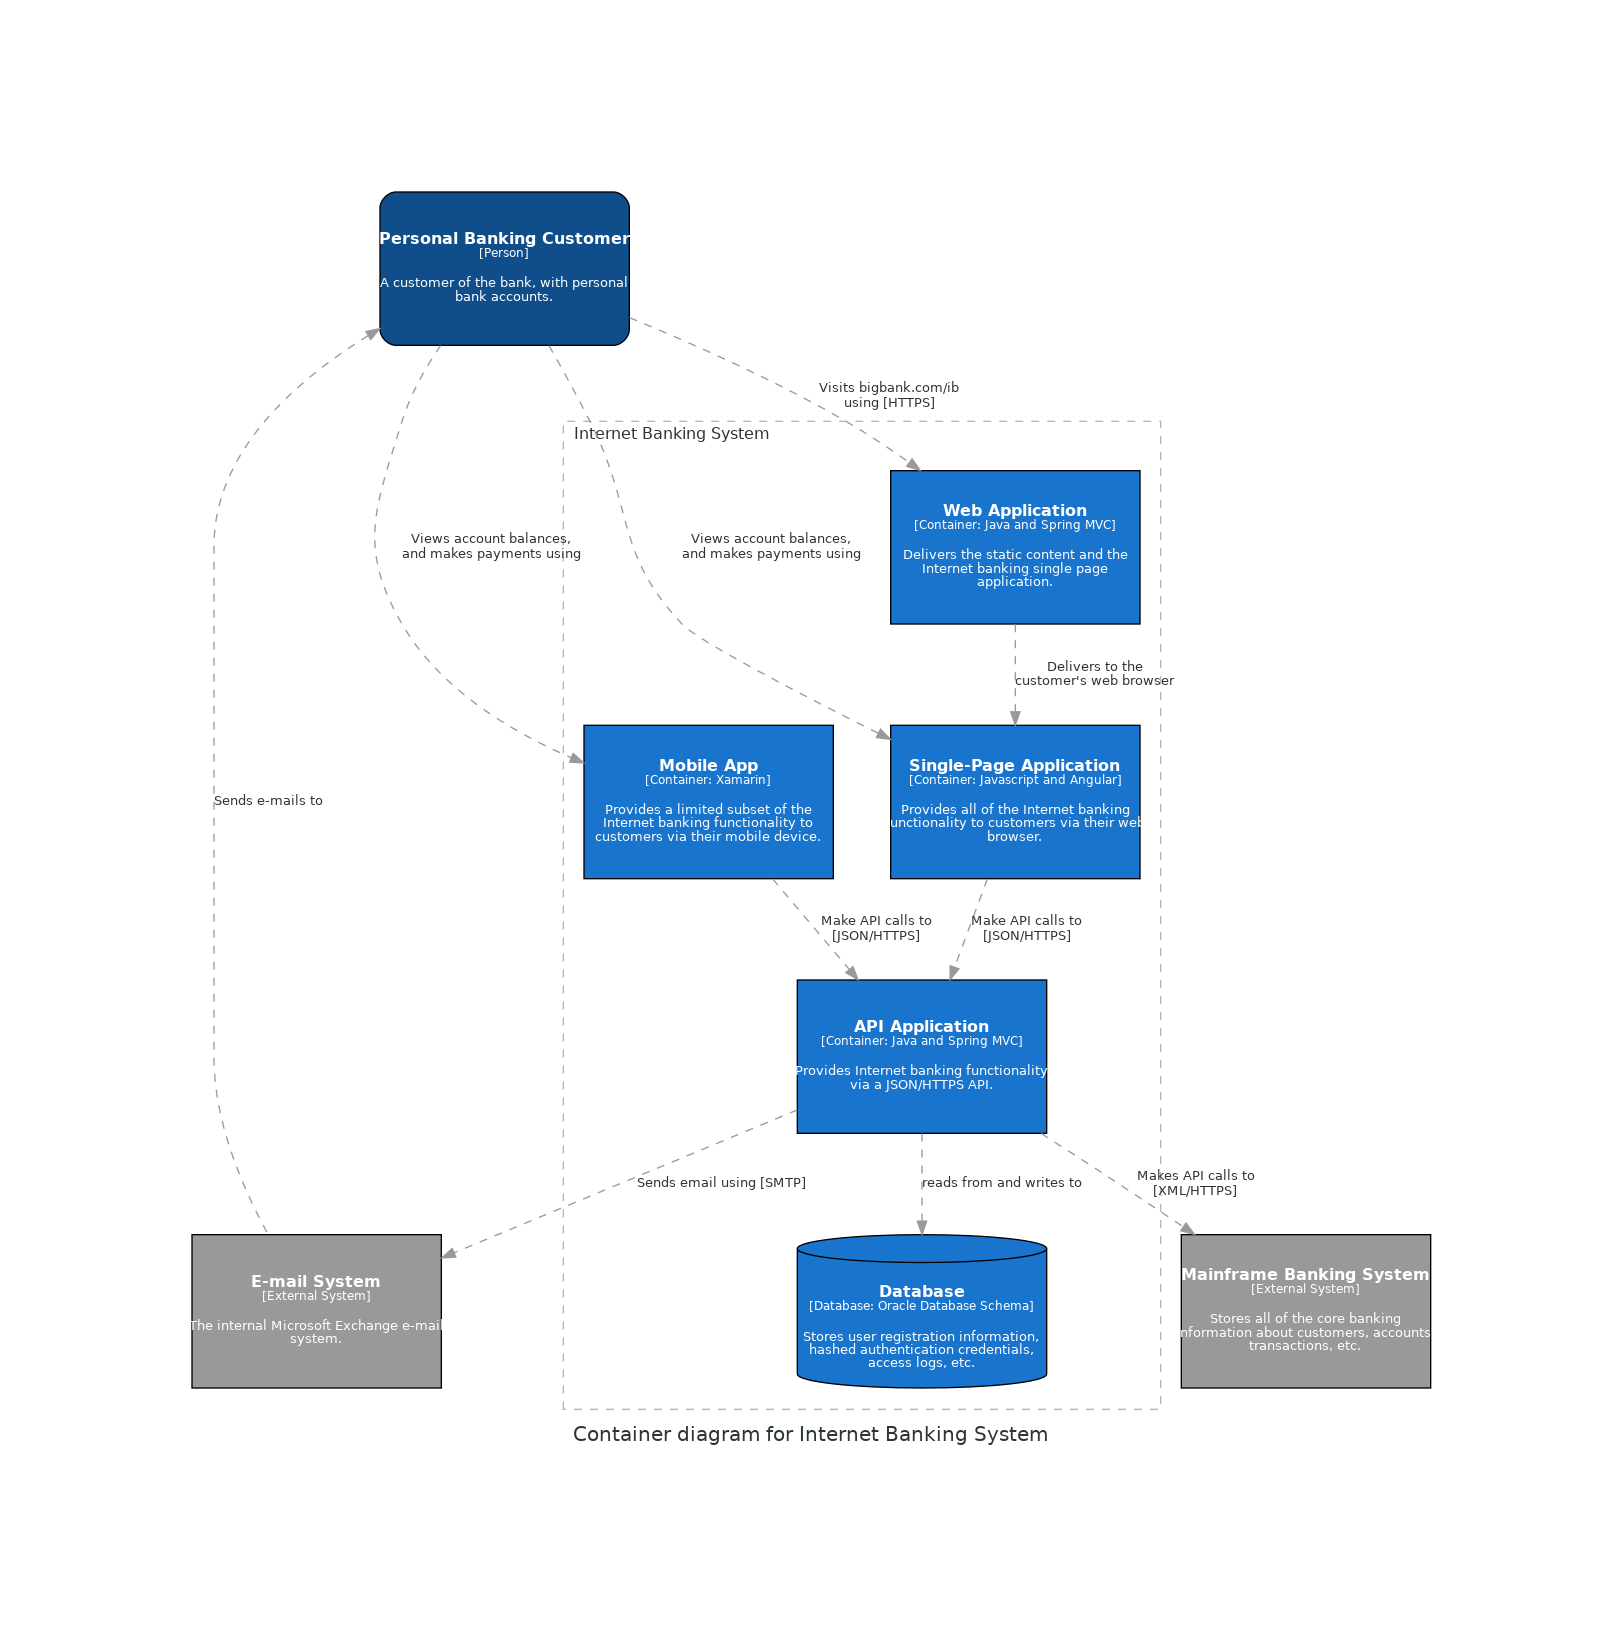

In [4]:
from diagrams import Diagram
from diagrams.c4 import Person, Container, Database, System, SystemBoundary, Relationship

graph_attr = {
    "splines": "spline",
}

with Diagram("Container diagram for Internet Banking System", direction="TB", graph_attr=graph_attr) as diag:
    customer = Person(
        name="Personal Banking Customer", description="A customer of the bank, with personal bank accounts."
    )

    with SystemBoundary("Internet Banking System"):
        webapp = Container(
            name="Web Application",
            technology="Java and Spring MVC",
            description="Delivers the static content and the Internet banking single page application.",
        )

        spa = Container(
            name="Single-Page Application",
            technology="Javascript and Angular",
            description="Provides all of the Internet banking functionality to customers via their web browser.",
        )

        mobileapp = Container(
            name="Mobile App",
            technology="Xamarin",
            description="Provides a limited subset of the Internet banking functionality to customers via their mobile device.",
        )

        api = Container(
            name="API Application",
            technology="Java and Spring MVC",
            description="Provides Internet banking functionality via a JSON/HTTPS API.",
        )

        database = Database(
            name="Database",
            technology="Oracle Database Schema",
            description="Stores user registration information, hashed authentication credentials, access logs, etc.",
        )

    email = System(name="E-mail System", description="The internal Microsoft Exchange e-mail system.", external=True)

    mainframe = System(
        name="Mainframe Banking System",
        description="Stores all of the core banking information about customers, accounts, transactions, etc.",
        external=True,
    )

    customer >> Relationship("Visits bigbank.com/ib using [HTTPS]") >> webapp
    customer >> Relationship("Views account balances, and makes payments using") >> [spa, mobileapp]
    webapp >> Relationship("Delivers to the customer's web browser") >> spa
    spa >> Relationship("Make API calls to [JSON/HTTPS]") >> api
    mobileapp >> Relationship("Make API calls to [JSON/HTTPS]") >> api

    api >> Relationship("reads from and writes to") >> database
    api >> Relationship("Sends email using [SMTP]") >> email
    api >> Relationship("Makes API calls to [XML/HTTPS]") >> mainframe
    customer << Relationship("Sends e-mails to") << email
diag

### AWS Diagrams

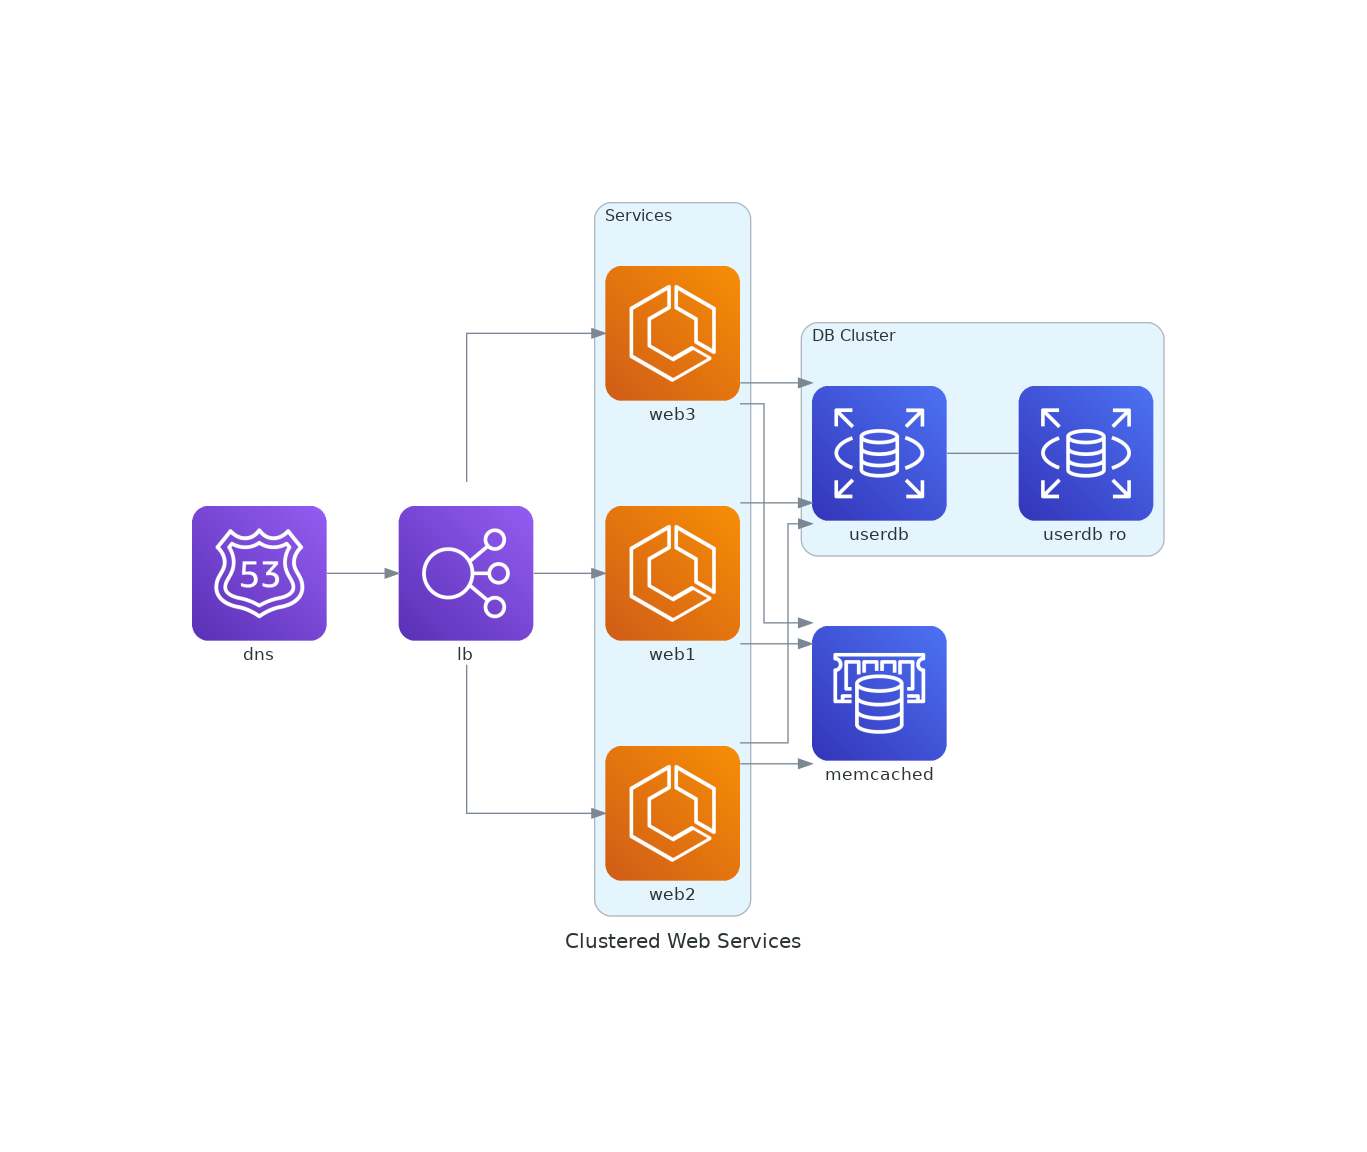

In [1]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.aws.database import ElastiCache, RDS
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53

with Diagram("Clustered Web Services", show=False) as diag:
    dns = Route53("dns")
    lb = ELB("lb")

    with Cluster("Services"):
        svc_group = [ECS("web1"),
                     ECS("web2"),
                     ECS("web3")]

    with Cluster("DB Cluster"):
        db_primary = RDS("userdb")
        db_primary - [RDS("userdb ro")]

    memcached = ElastiCache("memcached")

    dns >> lb >> svc_group
    svc_group >> db_primary
    svc_group >> memcached
diag

### Diagrams with custom icons

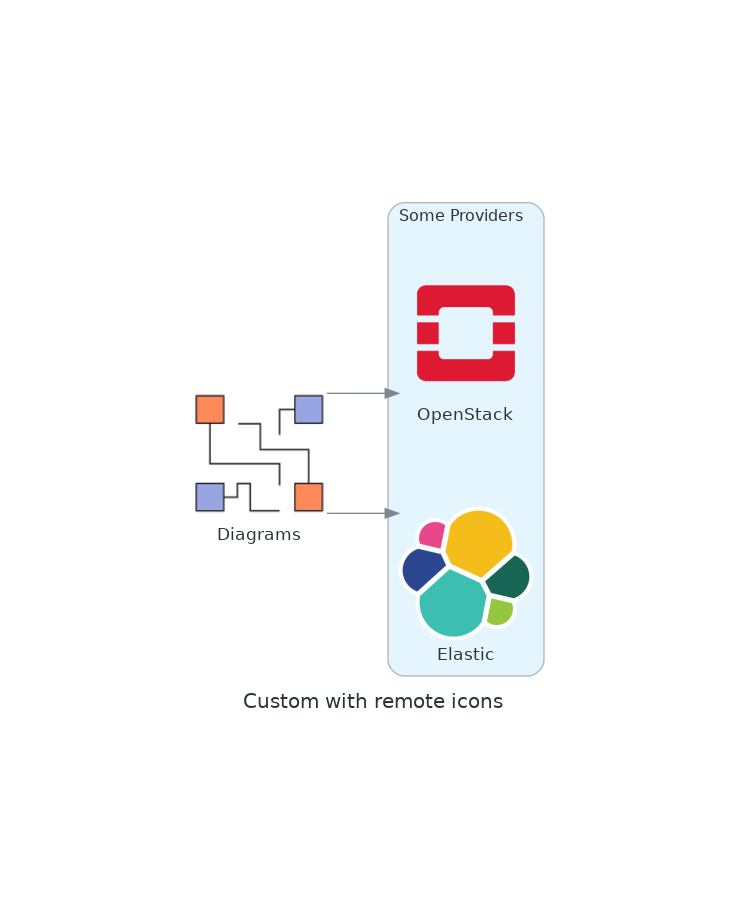

In [3]:
from diagrams import Diagram, Cluster
from diagrams.custom import Custom
from urllib.request import urlretrieve

with Diagram("Custom with remote icons", show=False, filename="custom_remote", direction="LR") as diag:

  # download the icon image file
  diagrams_url = "https://github.com/mingrammer/diagrams/raw/master/assets/img/diagrams.png"
  diagrams_icon = "diagrams.png"
  urlretrieve(diagrams_url, diagrams_icon)

  diagrams = Custom("Diagrams", diagrams_icon)

  with Cluster("Some Providers"):

    openstack_url = "https://github.com/mingrammer/diagrams/raw/master/resources/openstack/openstack.png"
    openstack_icon = "openstack.png"
    urlretrieve(openstack_url, openstack_icon)

    openstack = Custom("OpenStack", openstack_icon)

    elastic_url = "https://github.com/mingrammer/diagrams/raw/master/resources/elastic/saas/elastic.png"
    elastic_icon = "elastic.png"
    urlretrieve(elastic_url, elastic_icon)

    elastic = Custom("Elastic", elastic_icon)

  diagrams >> openstack
  diagrams >> elastic
diag

## Model Architectures

We use [Neutron.app](https://github.com/lutzroeder/Netron) to visualize model architectures.


